In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

In [6]:
def polCoder (text):
    if text == 'Very Conservative' or text == 'Conservative' or text == 'Slightly Conservative' or text == 'Very Conservative' or text == 'Libertarian - Right':
        text = 'Republican'

    elif text == 'Independen' or text == 'Cenrist' or text == 'Moderat' or text == 'Libertarian' or text == 'Other':
        text = 'Centrist'

    elif text == 'Libertarian - Left' or text == 'Slightly Liberal' or text == 'Liberal' or text == 'Very Liberal' or text == 'Progressive'  or text == 'Socialist' or text == 'Communist': 
        text = 'Democratic'
    
    else:
        text = 'None'
    
    return text

states = pd.read_csv('states_and_state_code.csv')
states_names = states.State.tolist()
states_codes = states.State_code.tolist()

def locFormater(loc):
    loc = str(loc)
    loc = loc.upper()
    f = 0

    for i in range(len(states_names)):
        states_names_CAP = states_names[i].upper()
        if states_names_CAP in loc:
            loc = states_names[i]
            f = 4
            break
        else:
            f = 3 

    if f == 3:
        for i in range(len(states_names)):
            states_names_CAP = states_names[i].upper()
            if states_names_CAP in loc:
                loc = states_names[i]
                f = 1
            else:
                f = 2

    if f == 2 or ',' in loc:
        for i in range(len(states_codes)):
            if ',' in loc:
                loct = loc.partition(',')
                if states_codes[i] in loct[-1]:
                    loc = states_names[i]
                    f = 1
                    break
            else:
                f = 0

    if loc == 'Pensylvania'.upper():
        loc = 'Pensylvania'
        f = 1

    if loc == 'Massachusett'.upper():
        loc = 'Massachusetts'
        f = 1

    if loc == 'Fla'.upper():
        loc = 'Florida'
        f = 1
    
    if f == 0:
        loc = None

    return loc

def processDF (df):
    df['Party'] = df.Political_leaning.apply(polCoder)

    thread_type =[]

    for i in range(1, df.Thread.max() + 1):
        df_t = df[df.Thread == i].copy(deep=True)
        pol_val_demo = df_t[df_t.Party == 'Democratic'].Polarity.mean()
        pol_val_repu = df_t[df_t.Party == 'Rebublican'].Polarity.mean()
        if (pol_val_demo > 0 and pol_val_repu > 0) or (pol_val_demo < 0 and pol_val_repu < 0):
            for i in range(len(df_t)):
                thread_type.append('Bipartisan')
        elif pol_val_demo > 0 or pol_val_repu < 0:
            for i in range(len(df_t)):
                thread_type.append('Democratic')
        else:
            for i in range(len(df_t)):
                thread_type.append('Republican')
        
    df['Thread_Type'] = thread_type
    df = df.dropna()
    df['State'] = df.Location.apply(locFormater)

    return df


In [13]:
path = 'Sentiment_Analysis/'
csvfiles = [(path + f) for f in listdir(path) if isfile(join(path, f))]

csvfiles

['Sentiment_Analysis/2012_US_Presidential_Elections.csv_results_thread_.csv',
 'Sentiment_Analysis/2016_US_Presidential_Elections.csv_results_thread_.csv',
 'Sentiment_Analysis/abortion_opinions.csv_results_thread_.csv',
 'Sentiment_Analysis/COVID-19_opinion.csv_results_thread_.csv',
 'Sentiment_Analysis/military_opinions.csv_results_thread_.csv',
 'Sentiment_Analysis/normal_opinions.csv_results_thread_.csv']

In [14]:
df_arr = []

for file in csvfiles:
    df = pd.read_csv(file)
    df_arr.append(processDF(df))

In [15]:
df_final = pd.concat(df_arr)
df_final

,Poster,Content,Thread,Gender,Location,Political_leaning,Subjectivity,Polarity,Party,Thread_Type,State
0,lpast,cpwill saidYou claimed to have been Pro-Life.C...,1,Male,Fla,Independen,0.543492,0.264048,Centrist,Democratic,Florida
1,cpwill,lpast saidI was for the lionshare of my life u...,1,Male,USofA,Conservative,0.693071,0.109071,Republican,Democratic,None
2,lpast,cpwill saidyes. so as soon as it became expen...,1,Male,Fla,Independen,0.712560,-0.018774,Centrist,Democratic,Florida
3,cpwill,lpast saidLike I said...you would take the goo...,1,Male,USofA,Conservative,0.602976,0.095810,Republican,Democratic,None
5,lpast,Sheik Yerbuti saidThis is a sickness among Con...,1,Male,Fla,Independen,1.000000,0.000000,Centrist,Democratic,Florida
...,...,...,...,...,...,...,...,...,...,...,...
13560,res borrachos,"d0gbreath saidRun Donald, runClick to expand.....",974,Female,New Englan,Moderat,0.300000,-0.150000,Centrist,Democratic,None
13561,Exquisitor,lemmiwinx saidHere's hoping we have Republican...,974,Male,UP of Michigan,Independen,0.150000,0.100000,Centrist,Democratic,Michigan
13563,res borrachos,lemmiwinx saidOMG at first I thought you said ...,974,Female,New Englan,Moderat,0.333333,0.250000,Centrist,Democratic,None
13564,d0gbreat,res borrachos saidI almost wan him to run just...,974,Male,"Denon, Texas",Very Liberal,0.400000,0.300000,Democratic,Democratic,Texas


Text(0.5, 1.0, 'Political conversations in Delaware')

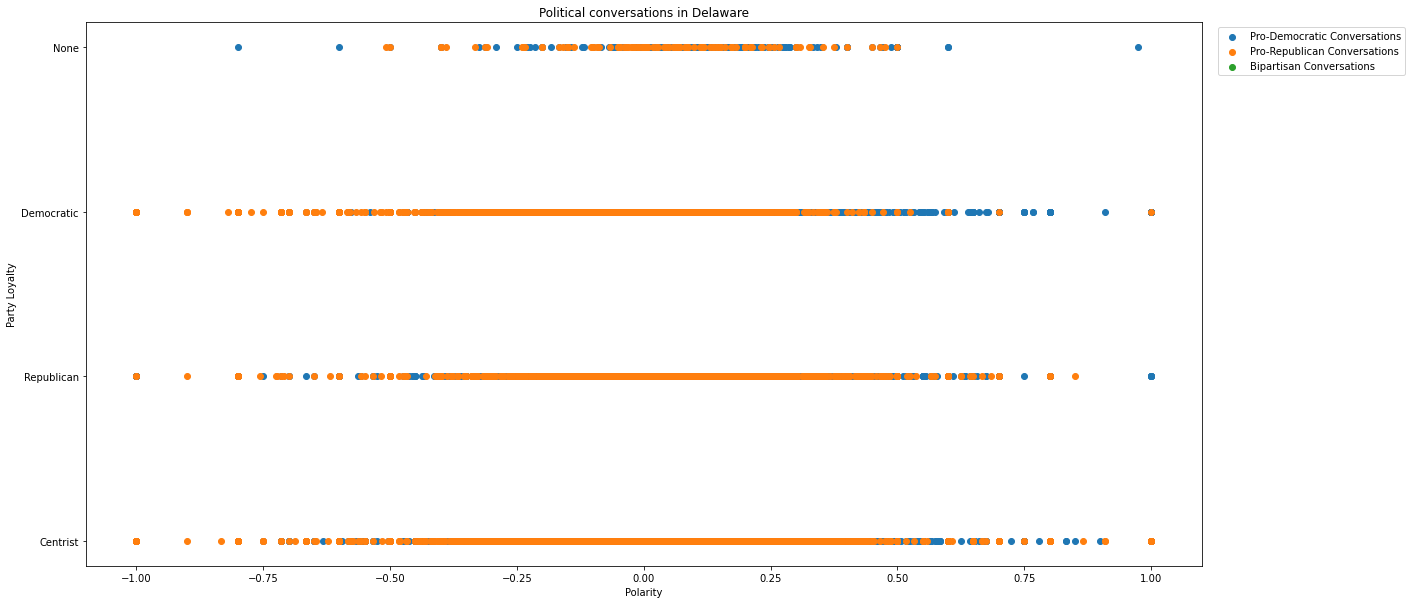

In [16]:
state_selected = 'Delaware'
df_sel = df_final[df_final.State == state_selected].copy(deep=True)

plt.figure(figsize=(20,10))
plt.scatter(df_final[df_final.Thread_Type == 'Democratic'].Polarity, df_final[df_final.Thread_Type == 'Democratic'].Party, label = 'Pro-Democratic Conversations')
plt.scatter(df_final[df_final.Thread_Type == 'Republican'].Polarity, df_final[df_final.Thread_Type == 'Republican'].Party, label = 'Pro-Republican Conversations')
plt.scatter(df_final[df_final.Thread_Type == 'Bipartisan'].Polarity, df_final[df_final.Thread_Type == 'Bipartisan'].Party, label = 'Bipartisan Conversations')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.xlabel('Polarity')
plt.ylabel('Party Loyalty')
plt.title(f'Political conversations in {state_selected}')

In [7]:
df_final.to_csv('sentiment_analysis_summary_train.csv', index=False)

In [10]:
path = 'prediction_data/'
csvfiles = [(path + f) for f in listdir(path) if isfile(join(path, f))]

display(csvfiles)

df_arr = []

for file in csvfiles:
    df = pd.read_csv(file)
    df_arr.append(processDF(df))

df_test = pd.concat(df_arr)
display(df_test)

df_final.to_csv(path + 'sentiment_analysis_summary_test.csv', index=False)

['prediction_data/2020_US_Congress_Elections.csv_results_thread_.csv',
 'prediction_data/2020_US_Presidential_Elections.csv_results_thread_.csv']

,Poster,Content,Thread,Gender,Location,Political_leaning,Subjectivity,Polarity,Party,Thread_Type,State
1,Phys251,Clicker III saidOpenly urging people to move t...,1,Male,Georgia,Slightly Liberal,0.620833,0.270833,Democratic,Republican,Georgia
4,Mr Person,Clicker III saidOpenly urging people to move t...,1,Male,Massachuset,Other,0.677074,0.050812,Centrist,Republican,None
8,The AniDonald,Mycroft saidKind of hard to blow this off as f...,1,Male,N. Virginia,Slightly Liberal,0.847222,-0.530556,Democratic,Republican,Virginia
9,LouC,Clicker III saidOpenly urging people to move t...,1,Male,"Near Boise, ID",Liberal,0.700000,0.150000,Democratic,Republican,Idaho
11,LouC,No wonder so many Republicans are so against p...,1,Male,"Near Boise, ID",Liberal,0.316667,0.300000,Democratic,Republican,Idaho
...,...,...,...,...,...,...,...,...,...,...,...
9640,ReubenSherr,BrotherFease saidI decided to take a break fro...,778,Male,"San Luis Obispo, CA",Slightly Conservative,0.335606,0.084848,Republican,Democratic,California
9641,BrotherFease,TomFitz saidIt will be a sizable victory if th...,778,Male,Western New York,Moderat,0.443143,0.379143,Centrist,Democratic,New York
9644,BrotherFease,Slavister saidWhat do you base that on? It's w...,778,Male,Western New York,Moderat,0.650000,0.100000,Centrist,Democratic,New York
9645,BrotherFease,Jay59 saidGood. You understand. Being so anony...,778,Male,Western New York,Moderat,0.468750,0.062500,Centrist,Democratic,New York


In [8]:
df = processDF(pd.read_csv('prediction_data/2020_US_Presidential_Elections.csv_results_thread_.csv'))
df.to_csv('prediction_data/sentiment_analysis_summary_test.csv')